In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
cancer = load_breast_cancer()
# xxx = pd.read_csv("xxx.csv")

In [4]:
X_train , X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=42)

In [5]:
#scaler = MinMaxScaler()
#scaler.fit(X_train)
scaler = MinMaxScaler().fit(X_train)

In [6]:
X_train_scaled = scaler.transform(X_train)

In [7]:
X_train_scaled

array([[0.2546158 , 0.11531958, 0.24164177, ..., 0.18439863, 0.14665878,
        0.11961682],
       [0.27959254, 0.36557322, 0.28965713, ..., 0.704811  , 0.39818648,
        0.47355036],
       [0.25804398, 0.29015894, 0.25793143, ..., 0.22707904, 0.32367435,
        0.14776195],
       ...,
       [0.32317939, 0.2404464 , 0.30146536, ..., 0.11453608, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.30729834, ..., 0.62783505, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20842225, ..., 0.25536082, 0.22255076,
        0.11648016]])

In [8]:
svm = SVC()

In [9]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
X_test_scaled = scaler.transform(X_test)

In [46]:
X_test_scaled.shape, y_test.shape

((143, 30), (143,))

In [11]:
print("test acc : {:.3f}".format(svm.score(X_test_scaled,y_test)))
#test acc : 0.979

test acc : 0.979


In [12]:
# GridSearch Cross Validation 

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(SVC(), param_grid,cv=5)
grid.fit(X_train_scaled, y_train)

print("best parameter :", grid.best_params_)
print("cross val acc: {:.2f}".format(grid.best_score_))
print("test acc : {:.2f}".format(grid.score(X_test_scaled, y_test)))

best parameter : {'C': 1, 'gamma': 1}
cross val acc: 0.98
test acc : 0.98


In [14]:
### pipe line

In [15]:
from sklearn.pipeline import Pipeline


In [16]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [17]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [18]:
print("test acc : {:.2f}".format(pipe.score(X_test,y_test)))

test acc : 0.98


In [19]:
param_grid = {'svm__C':[0.001,0.01,0.1,1,10,100],
             "svm__gamma": [0.001,0.01,0.1,1,10,100]}

In [20]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),


In [21]:
print("best parameter :", grid.best_params_)
print("best score: {:.2f}".format(grid.best_score_))
print("test acc : {:.2f}".format(grid.score(X_test, y_test)))

best parameter : {'svm__C': 10, 'svm__gamma': 0.1}
best score: 0.97
test acc : 0.99


In [22]:
#make pipeline

In [23]:
from sklearn.pipeline import make_pipeline


In [24]:
pipe_long = Pipeline( [ ("scaler", MinMaxScaler()), ("svm", SVC(C=100))])

In [25]:
pipe_short = make_pipeline(MinMaxScaler(),SVC(C=100))

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler()) 
# 3단계 

In [28]:
print("파이프 라인 단계 \n", pipe.steps)

파이프 라인 단계 
 [('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [29]:
    pipe.fit(cancer.data)

Pipeline(memory=None,
         steps=[('standardscaler-1',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('standardscaler-2',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [30]:
components = pipe.named_steps["pca"].components_
print("components.shape",components.shape)

components.shape (2, 30)


In [31]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(),LogisticRegression())

In [32]:
param_grid = {'logisticregression__C':[0.01,0.1,1,10,100]}
grid =GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_clas

In [33]:
grid.best_estimator_
#최상의 모델

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
boston.data, boston.target, random_state=42)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [36]:
param_grid = {
    'polynomialfeatures__degree' : [1,2,3],
    'ridge__alpha' : [0.001, 0.01, 0.1,1,10,100]
}

In [37]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                         

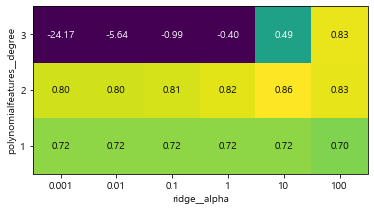

In [38]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3,-1), 
                      xlabel="ridge__alpha", ylabel="polynomialfeatures__degree", 
                        xticklabels=param_grid['ridge__alpha'], yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [39]:
pipe = Pipeline([ ('preprocessing',StandardScaler()), ('classifier', SVC())])

In [40]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {
        'classifier': [SVC()],
        'preprocessing' :[StandardScaler()],
        'classifier__gamma':[0.001,0.01,0.1,1,10,100],
        'classifier__C':[0.001,0.01,0.1,1,10,100]
    },
    {
        'classifier': [RandomForestClassifier(n_estimators=100)],
        'preprocessing' :[None],
        'classifier__max_features':[1,2,3]
    }
]

In [41]:
X_train, X_test, y_train,y_test = train_test_split(
cancer.data, cancer.target, random_state=42)

grid = GridSearchCV( pipe, param_grid, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki...
                                            

In [42]:
print("최적 매개 변수 :")


최적 매개 변수 :


In [43]:
###########

In [44]:
from sklearn.datasets import load_files


In [45]:
reviews_train = load_files("data/aclImdb/train")

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'data/aclImdb/train'

In [ ]:
from sklearn.datasets import load_files

In [ ]:
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입 : ", type(text_train))
print("text_train의 길이: ", len(text_train))
print("text_train[6 : \n]", text_train[6])

In [ ]:
text_train = [doc.replace(b"<br />", b"") for doc in text_train]
text_train
# <br> removing

In [ ]:
print(" 분류별 개수: ", np.bincount(y_train))

In [ ]:
reviews_test = load_files("data/aclImdb/test")

In [ ]:
text_test, y_test = reviews_test.data, reviews_test.target

In [ ]:
print("테스트 데이터 수 :", len(text_test))

In [ ]:
print("클래스 별 수 :", np.bincount(y_test))

In [ ]:
text_test = [doc.replace( b"<br />", b"" ) for doc in text_test]

In [ ]:
bards_words =["The fool doth think he is wise,"," but the wise man know himself to be a fool"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer()
vect.fit(bards_words)

In [ ]:
print("어휘 사전의 크기 :", len(vect.vocabulary_))
print("어휘 사전의 내용 :\n", vect.vocabulary_)

In [ ]:
sorted(vect.vocabulary_.items())
# a알파벳순서 정렬

In [ ]:
bag_of_words = vect.transform(bards_words)
print(bag_of_words.toarray())

In [ ]:
bag_of_words.toarray()

In [ ]:
bag_of_words


In [ ]:
%%time
vect = CountVectorizer().fit(text_train)
#Wall time: 10.9 s

In [ ]:
%%time
X_train = vect.transform(text_train)

In [ ]:
#feature
feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:", feature_names[:20])
print("20010번째 부터 20030번째 까지의 특성: \n", feature_names[20010:20030])
print("매 2000번 마다의 특성: \n", feature_names[::2000])

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
    
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("교차 검증 평균 점수 : {:.2f}".format(np.mean(scores)))

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수 : {:.2f}".format(grid.best_score_))

In [ ]:
X_test = vect.transform(text_test)
print("test acc : {:.2f}".format(grid.score(X_test,y_test)))

In [ ]:
print("최적의 매개 변수 : ",grid.best_params_)

In [ ]:
vect = CountVectorizer(min_df=5).fit(text_train)
#5번 이하로 나오는 애들은 자른다
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train : ", X_train)

In [ ]:
feature_names = vect.get_feature_names()
print("처음 50개", feature_names[:50])
print("20010~20030 번째 특성 :\n", feature_names[20010:20030])
print("매 7000번째 특성 : \n", feature_names[::7000])

In [ ]:
%%time
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수 : {:.2f}".format(grid.best_score_))

In [ ]:
# 불 용어 :stopword: a, the, this 너무 자주 나와서 의미 없는 단어들.

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
print("불용어 개수:", len(ENGLISH_STOP_WORDS))

In [ ]:
vect = CountVectorizer(min_df=5, stop_words = "english").fit(text_train)

In [ ]:
X_train = vect.transform(text_train)

In [ ]:
print("min df로 제한한 X_train \n", repr(X_train))

In [ ]:
print("불용어가 제거된 X_train \n", X_train)

In [ ]:
%%time
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train,y_train)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(CountVectorizer(), LogisticRegression())
param_grid = {
    "countvectorizer__max_df": [100,1000,10000,20000],
    "logisticregression__C" : [0.001,0.01,0.1,1,10]
}
grid = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
grid.fit(text_train,y_train)

In [ ]:
print("최상의 밸리데이션 점수 : {:.3f}".format(grid.best_score_))

In [ ]:
print("최상의 파라미터 조건 : " , grid.best_params_)

In [ ]:
len(grid.best_estimator_.named_steps['countvectorizer'].vocabulary)

In [ ]:
grid.best_estimator_.named_steps['countvectorizer']